<a href="https://colab.research.google.com/github/sunandhini96/School_of_AI_Assignment_8/blob/main/sunandini_assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sunandhini96/Main_Models.git

Cloning into 'Main_Models'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 235 (delta 70), reused 0 (delta 0), pack-reused 108
Receiving objects: 100% (235/235), 70.60 KiB | 330.00 KiB/s, done.
Resolving deltas: 100% (110/110), done.


In [2]:
cd /content/Main_Models

/content/Main_Models


In [3]:
!ls

main.py  Models  README.md  utils.py


In [4]:
from Models import *

In [5]:
from main import *

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
!pip install torch_lr_finder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from Models.custom_resnet import CustomResNet,ResBlock

hello
CUDA Available? True


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
torch.Size([60, 3, 32, 32])
Files already downloaded and verified


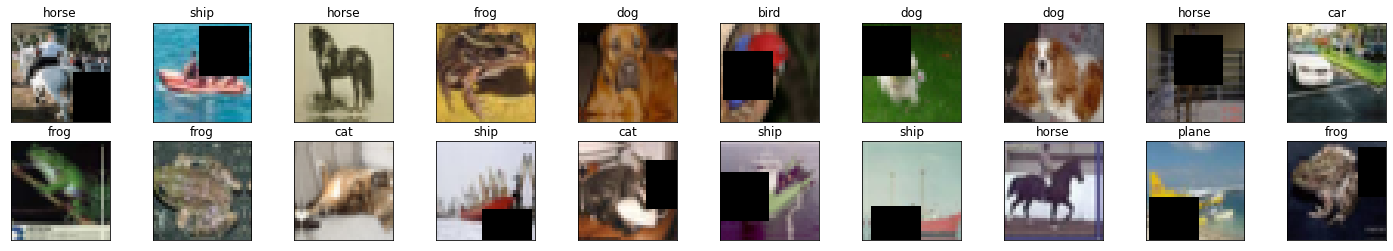

In [8]:
from utils import *

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = CustomResNet(ResBlock).to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
         ResBlock-14          [-1,

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import datasets, transforms
from tqdm import tqdm

In [11]:
# loading the dataset
exp = datasets.CIFAR10('./data', train=True, download=True)
exp_data = exp.data

# Calculate the mean and std for normalization
print('[Train]')
print(' - Numpy Shape:', exp_data.shape)
print(' - min:', np.min(exp_data, axis=(0,1,2)) / 255.)
print(' - max:', np.max(exp_data, axis=(0,1,2)) / 255.)
print(' - mean:', np.mean(exp_data, axis=(0,1,2)) / 255.)
print(' - std:', np.std(exp_data, axis=(0,1,2)) / 255.)
print(' - var:', np.var(exp_data, axis=(0,1,2)) / 255.)

Files already downloaded and verified
[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - min: [0. 0. 0.]
 - max: [1. 1. 1.]
 - mean: [0.49139968 0.48215841 0.44653091]
 - std: [0.24703223 0.24348513 0.26158784]
 - var: [15.56135559 15.11767693 17.44919073]


In [12]:
exp.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

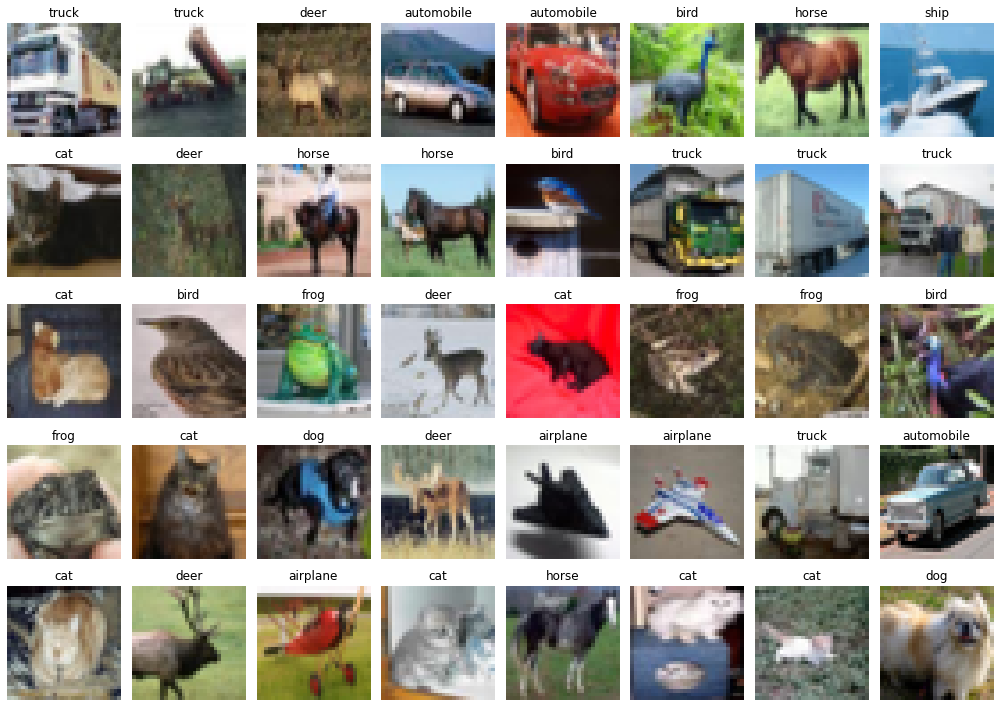

In [13]:
viz_data()


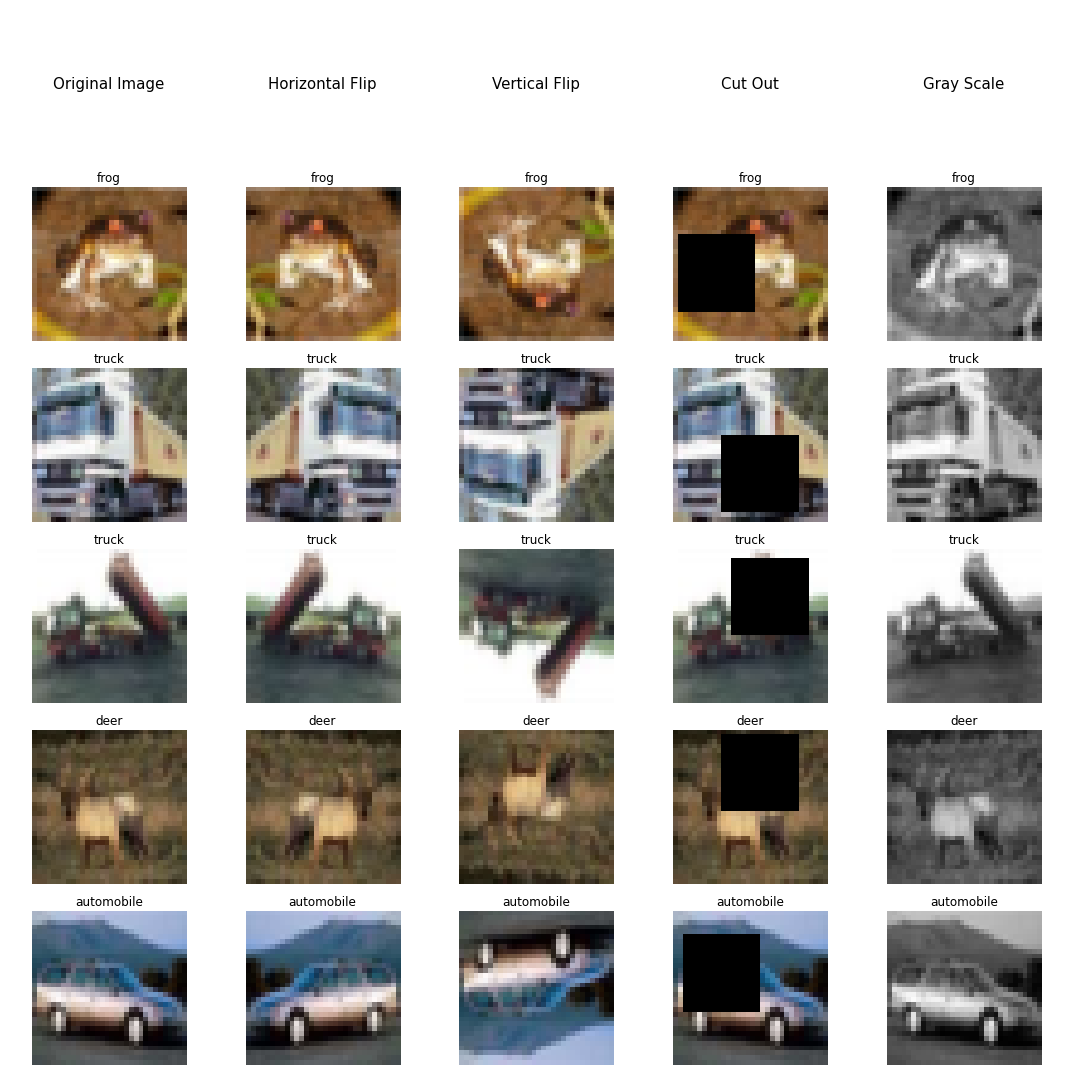

In [14]:
show_images({
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, 
                               min_width=16, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
})

In [15]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available:", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)
    BATCH_SIZE=512
else:
    BATCH_SIZE=64

CUDA Available: True


In [16]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True )
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(trainset, train=True), batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(testset, train=False), batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.74E-02


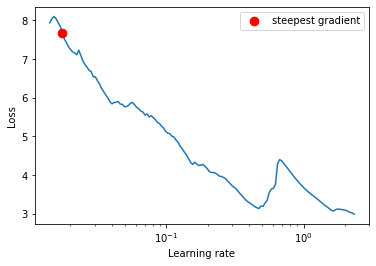

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0438671c70>,
 0.017426333860096503)

In [17]:
net4 = CustomResNet(ResBlock).to(device)
import copy
net4_exp = copy.deepcopy(net4)
optimizer = torch.optim.SGD(net4.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(net4, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=10, num_iter=200)
lr_finder.plot() 

In [18]:
min_loss = min(lr_finder.history['loss'])
ler_rate = lr_finder.history['lr'][np.argmin(lr_finder.history['loss'], axis=0)]
print("Max LR is {}".format(ler_rate))

Max LR is 2.409403560239525


In [19]:
min_lr=ler_rate/10
print("Min LR is {}".format(min_lr))

Min LR is 0.24094035602395253


In [ ]:

optimizer = torch.optim.SGD(net4.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=ler_rate,
                                                steps_per_epoch=len(train_loader), 
                                                epochs=24,
                                                pct_start=0.2,
                                                div_factor=10,
                                                three_phase=False, 
                                                final_div_factor=50,
                                                anneal_strategy='linear'
                                                ) #final_div_factor=100,
net, history = fit_model(
    net=net4, device=device,
    criterion = nn.CrossEntropyLoss(),
    train_loader=train_loader, test_loader=test_loader,
    optimizer=optimizer, 
    scheduler=scheduler, 
    NUM_EPOCHS=24
)

EPOCH: 1 (LR: 0.04397603609302721)


Batch_id=97 Loss=5.61212 Accuracy=12.33%: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]



Test set: Average loss: 2.2782, Accuracy: 1561/10000 (15.61%)

EPOCH: 2 (LR: 0.12660676432917972)


Batch_id=97 Loss=2.19860 Accuracy=18.06%: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]



Test set: Average loss: 2.0912, Accuracy: 2230/10000 (22.30%)

EPOCH: 3 (LR: 0.20923749256533225)


Batch_id=97 Loss=2.94079 Accuracy=12.39%: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 2.3161, Accuracy: 1051/10000 (10.51%)

EPOCH: 4 (LR: 0.2918682208014848)


Batch_id=97 Loss=2.28574 Accuracy=11.89%: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 2.2961, Accuracy: 1037/10000 (10.37%)

EPOCH: 5 (LR: 0.3744989490376373)


Batch_id=97 Loss=2.25492 Accuracy=14.35%: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 2.2949, Accuracy: 1193/10000 (11.93%)

EPOCH: 6 (LR: 0.4349554367655754)


Batch_id=97 Loss=2.27094 Accuracy=13.07%: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 2.2371, Accuracy: 1581/10000 (15.81%)

EPOCH: 7 (LR: 0.4120970596713873)


Batch_id=97 Loss=2.20878 Accuracy=17.29%: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 2.1676, Accuracy: 1863/10000 (18.63%)

EPOCH: 8 (LR: 0.38923868257719924)


Batch_id=97 Loss=2.07110 Accuracy=22.25%: 100%|██████████| 98/98 [00:35<00:00,  2.79it/s]



Test set: Average loss: 2.0915, Accuracy: 2397/10000 (23.97%)

EPOCH: 9 (LR: 0.36638030548301115)


Batch_id=97 Loss=1.93966 Accuracy=27.32%: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 1.9002, Accuracy: 2841/10000 (28.41%)

EPOCH: 10 (LR: 0.343521928388823)


Batch_id=97 Loss=2.01635 Accuracy=24.60%: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]



Test set: Average loss: 1.9794, Accuracy: 2511/10000 (25.11%)

EPOCH: 11 (LR: 0.3206635512946349)


Batch_id=97 Loss=1.85010 Accuracy=30.86%: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]



Test set: Average loss: 1.8167, Accuracy: 3235/10000 (32.35%)

EPOCH: 12 (LR: 0.29780517420044683)


Batch_id=97 Loss=1.78684 Accuracy=33.64%: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 1.8618, Accuracy: 3114/10000 (31.14%)

EPOCH: 13 (LR: 0.2749467971062587)


Batch_id=97 Loss=1.75906 Accuracy=34.78%: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 1.8485, Accuracy: 3159/10000 (31.59%)

EPOCH: 14 (LR: 0.2520884200120706)


Batch_id=97 Loss=1.72327 Accuracy=36.36%: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 1.7313, Accuracy: 3499/10000 (34.99%)

EPOCH: 15 (LR: 0.22923004291788251)


Batch_id=97 Loss=1.69392 Accuracy=37.44%: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 1.7556, Accuracy: 3549/10000 (35.49%)

EPOCH: 16 (LR: 0.2063716658236944)


Batch_id=97 Loss=1.67251 Accuracy=38.11%: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 1.7130, Accuracy: 3655/10000 (36.55%)

EPOCH: 17 (LR: 0.18351328872950629)


Batch_id=97 Loss=1.64551 Accuracy=39.08%: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]



Test set: Average loss: 1.6470, Accuracy: 3840/10000 (38.40%)

EPOCH: 18 (LR: 0.1606549116353182)


Batch_id=97 Loss=1.61863 Accuracy=40.59%: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]



Test set: Average loss: 1.6999, Accuracy: 3736/10000 (37.36%)

EPOCH: 19 (LR: 0.1377965345411301)


Batch_id=97 Loss=1.60195 Accuracy=41.05%: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]



Test set: Average loss: 1.6320, Accuracy: 3897/10000 (38.97%)

EPOCH: 20 (LR: 0.11493815744694197)


Batch_id=97 Loss=1.56943 Accuracy=42.44%: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 1.6189, Accuracy: 4070/10000 (40.70%)

EPOCH: 21 (LR: 0.09207978035275388)


Batch_id=97 Loss=1.54352 Accuracy=43.53%: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 1.6183, Accuracy: 3987/10000 (39.87%)

EPOCH: 22 (LR: 0.0692214032585658)


Batch_id=97 Loss=1.51597 Accuracy=45.00%: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]



Test set: Average loss: 1.5993, Accuracy: 4103/10000 (41.03%)

EPOCH: 23 (LR: 0.04636302616437765)


Batch_id=97 Loss=1.48506 Accuracy=45.88%: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 1.6353, Accuracy: 4052/10000 (40.52%)

EPOCH: 24 (LR: 0.02350464907018962)


Batch_id=97 Loss=1.46214 Accuracy=46.81%: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 1.5928, Accuracy: 4134/10000 (41.34%)

